---

## Inital Setup

---

In [1]:
# initial imports
import numpy as np
import pandas as pd

In [2]:
# specify the date parsing format
date_format = '%m/%d'

# loading and visualizing dataset into a dataframe
df = pd.read_csv('/kaggle/input/cloud-coverage-detection/train.csv',low_memory=False)

# visualize dataframe
df.head()

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,01-Jan,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,01-Jan,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,01-Jan,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,01-Jan,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,01-Jan,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0


In [ ]:
# brief description of all the columns
'''
DATE (MM/DD): Date in MM/DD format.

MST: Time of the day in MST (Mountain Standard Time).

Global CMP22 (vent/cor) [W/m^2]: Global solar radiation measured by CMP22 sensor, adjusted for ventilation and correction (units: W/m^2).

Direct sNIP [W/m^2]: Direct solar radiation measured by sNIP sensor (units: W/m^2).

Azimuth Angle [degrees]: Solar azimuth angle (angle from true north) at the given time (units: degrees).

Tower Dry Bulb Temp [deg C]: Ambient air temperature measured by tower's dry bulb thermometer (units: degrees Celsius).

Tower Wet Bulb Temp [deg C]: Ambient air temperature measured by tower's wet bulb thermometer (units: degrees Celsius).

Tower Dew Point Temp [deg C]: Dew point temperature measured by tower (units: degrees Celsius).

Tower RH [%]: Relative humidity measured by tower (units: %).

Total Cloud Cover [%]: Percentage of sky covered by clouds.

Peak Wind Speed @ 6ft [m/s]: Maximum wind speed at 6 feet above ground (units: meters per second).

Avg Wind Direction @ 6ft [deg from N]: Average wind direction at 6 feet above ground, measured in degrees clockwise from north.

Station Pressure [mBar]: Atmospheric pressure at the station location (units: millibars).

Precipitation (Accumulated) [mm]: Accumulated precipitation (units: millimeters).

Snow Depth [cm]: Depth of snow cover (units: centimeters).

Moisture: Moisture level (unitless, possibly qualitative or a categorical measure).

Albedo (CMP11): Albedo measured by CMP11 sensor (unitless), refers to the proportion of sunlight that a surface reflects. It's a value between 0 and 1, where:
• 0: Represents a perfectly black surface that absorbs all incoming sunlight and reflects none.
• 1: Represents a perfectly reflective surface that bounces back all the sunlight that hits it.DATE (MM/DD): Date in MM/DD format.
'''

In [3]:
# data metrics
df.describe()

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
count,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,480931.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000,482400.000000
mean,203.417447,241.620827,180.002353,12.467373,5.067534,-2.698022,40.327665,23.611655,2.830681,168.190142,817.087196,0.374163,-2.826314,0.061655,0.129371
std,295.831990,369.333659,101.616425,10.578051,6.865294,7.315305,24.050161,34.740024,2.020588,116.355121,5.136720,1.928488,188.916827,0.237741,0.180258
min,-4.764200,-12.403300,0.000120,-16.690000,-17.351000,-24.830000,4.210000,0.000000,0.000000,0.000000,794.918000,0.000000,-7999.000000,0.000000,0.000000
25%,-1.081940,-0.197820,88.578010,4.170000,-0.261000,-8.109000,21.980000,0.000000,1.450000,44.580000,813.989000,0.000000,0.082000,0.000000,0.000000
50%,7.653785,0.266632,179.992330,13.020000,5.363000,-3.119000,33.630000,0.000000,2.450000,177.300000,817.553000,0.000000,0.656000,0.000000,0.000000
75%,351.550500,537.677250,271.428125,20.770000,11.096000,2.668000,53.010000,37.000000,3.700000,282.200000,820.553000,0.000000,1.032000,0.000000,0.201800
max,1428.650000,1069.200000,359.998560,36.320000,19.416000,17.418000,100.100000,100.000000,23.450000,360.000000,847.963000,28.190000,28.430000,1.000000,2.000000


In [4]:
# number of entries
df.count()

DATE (MM/DD)                             482400
MST                                      482400
Global CMP22 (vent/cor) [W/m^2]          482400
Direct sNIP [W/m^2]                      482400
Azimuth Angle [degrees]                  482400
Tower Dry Bulb Temp [deg C]              482400
Tower Wet Bulb Temp [deg C]              482400
Tower Dew Point Temp [deg C]             482400
Tower RH [%]                             482400
Total Cloud Cover [%]                    480931
Peak Wind Speed @ 6ft [m/s]              482400
Avg Wind Direction @ 6ft [deg from N]    482400
Station Pressure [mBar]                  482400
Precipitation (Accumulated) [mm]         482400
Snow Depth [cm]                          482400
Moisture                                 482400
Albedo (CMP11)                           482400
dtype: int64

In [5]:
# number of missing entries
missing_counts = df.isnull().sum()
print(missing_counts)

missing_target_values = df['Total Cloud Cover [%]'].isnull().sum()

# drop missing values
df = df.dropna(axis=0)

DATE (MM/DD)                             44640
MST                                      44640
Global CMP22 (vent/cor) [W/m^2]          44640
Direct sNIP [W/m^2]                      44640
Azimuth Angle [degrees]                  44640
Tower Dry Bulb Temp [deg C]              44640
Tower Wet Bulb Temp [deg C]              44640
Tower Dew Point Temp [deg C]             44640
Tower RH [%]                             44640
Total Cloud Cover [%]                    46109
Peak Wind Speed @ 6ft [m/s]              44640
Avg Wind Direction @ 6ft [deg from N]    44640
Station Pressure [mBar]                  44640
Precipitation (Accumulated) [mm]         44640
Snow Depth [cm]                          44640
Moisture                                 44640
Albedo (CMP11)                           44640
dtype: int64


In [6]:
# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'Cloud Cover % vs Entry Number'}>

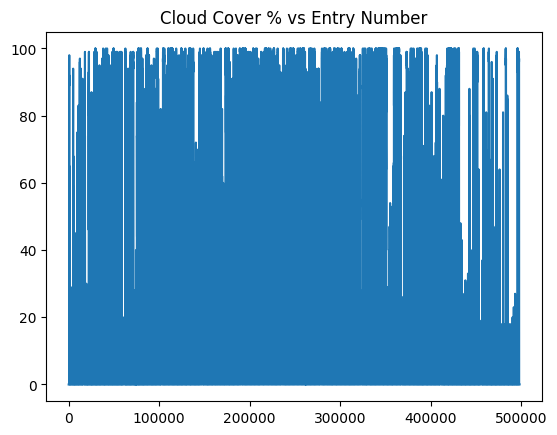

In [7]:
# plotting the cloud cover % wrt date (has missing values)
cloud_cover = df['Total Cloud Cover [%]']
cloud_cover.plot(kind='line', title='Cloud Cover % vs Entry Number')

---

## Pre-Processing

---

In [8]:
# apply sine and cosine transformation to azimuth angle
df['sin(Azimuth)'] = np.sin(np.radians(df['Azimuth Angle [degrees]']))
df['cos(Azimuth)'] = np.cos(np.radians(df['Azimuth Angle [degrees]']))

# drop the original column
df.drop(columns=['Azimuth Angle [degrees]'], inplace=True)

# apply sine and cosine transformation to avg wind direction
df['sin(Avg Wind Direction)'] = np.sin(np.deg2rad(df['Avg Wind Direction @ 6ft [deg from N]']))
df['cos(Avg Wind Direction)'] = np.cos(np.deg2rad(df['Avg Wind Direction @ 6ft [deg from N]']))

# drop the original column
df = df.drop(['Avg Wind Direction @ 6ft [deg from N]'], axis=1)

# updated dataframe
df.head()

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),sin(Azimuth),cos(Azimuth),sin(Avg Wind Direction),cos(Avg Wind Direction)
0,01-Jan,00:00,-0.962276,0.000000,7.216,0.988,-7.312,32.33,0.0,9.95,806.779,0.0,0.219,0.0,0.0,-0.054839,0.998495,-0.999743,0.022687
1,01-Jan,00:01,-0.937921,0.000000,7.251,1.040,-7.260,32.40,0.0,8.20,806.840,0.0,0.206,0.0,0.0,-0.040916,0.999163,-0.998719,0.050593
2,01-Jan,00:02,-0.944395,0.000000,7.256,1.093,-7.207,32.54,0.0,6.70,806.876,0.0,0.148,0.0,0.0,-0.026973,0.999636,-0.946649,0.322266
3,01-Jan,00:03,-0.951350,-0.029673,7.254,1.060,-7.440,31.89,0.0,7.70,806.823,0.0,0.235,0.0,0.0,-0.013017,0.999915,-0.913545,0.406737
4,01-Jan,00:04,-0.934976,-0.054401,7.331,1.081,-7.419,31.78,0.0,7.20,806.762,0.0,0.182,0.0,0.0,0.000945,1.000000,-0.963630,0.267238


In [9]:
# convert date to 
df['DATE (MM/DD)'] = pd.to_datetime(df['DATE (MM/DD)'], errors='coerce', format='%d-%b').fillna(
    pd.to_datetime(df['DATE (MM/DD)'], errors='coerce', format='%b-%d')).dt.dayofyear

# convert MST to numerical hours
df['MST'] = pd.to_datetime(df['MST'], format='%H:%M').dt.hour + pd.to_datetime(df['MST'], format='%H:%M').dt.minute / 60

# updated dataframe
df.head()

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),sin(Azimuth),cos(Azimuth),sin(Avg Wind Direction),cos(Avg Wind Direction)
0,1.0,0.000000,-0.962276,0.000000,7.216,0.988,-7.312,32.33,0.0,9.95,806.779,0.0,0.219,0.0,0.0,-0.054839,0.998495,-0.999743,0.022687
1,1.0,0.016667,-0.937921,0.000000,7.251,1.040,-7.260,32.40,0.0,8.20,806.840,0.0,0.206,0.0,0.0,-0.040916,0.999163,-0.998719,0.050593
2,1.0,0.033333,-0.944395,0.000000,7.256,1.093,-7.207,32.54,0.0,6.70,806.876,0.0,0.148,0.0,0.0,-0.026973,0.999636,-0.946649,0.322266
3,1.0,0.050000,-0.951350,-0.029673,7.254,1.060,-7.440,31.89,0.0,7.70,806.823,0.0,0.235,0.0,0.0,-0.013017,0.999915,-0.913545,0.406737
4,1.0,0.066667,-0.934976,-0.054401,7.331,1.081,-7.419,31.78,0.0,7.20,806.762,0.0,0.182,0.0,0.0,0.000945,1.000000,-0.963630,0.267238


In [10]:
# drop rows where the target variable 'Total Cloud Cover [%]' is missing
df_cleaned = df.dropna(subset=['Total Cloud Cover [%]'], axis=0)

# forward fill missing values
df_ffill = df_cleaned.fillna(method='ffill')

# backward fill any remaining missing values
df_imputed = df_ffill.fillna(method='bfill')

# check for remaining missing values
remaining_missing_values = df_imputed.isna().sum()
print("Remaining missing values after forward and backward fill:")
print(remaining_missing_values)

/tmp/ipykernel_34/3720883671.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df_cleaned.fillna(method='ffill')
/tmp/ipykernel_34/3720883671.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputed = df_ffill.fillna(method='bfill')


Remaining missing values after forward and backward fill:
DATE (MM/DD)                        0
MST                                 0
Global CMP22 (vent/cor) [W/m^2]     0
Direct sNIP [W/m^2]                 0
Tower Dry Bulb Temp [deg C]         0
Tower Wet Bulb Temp [deg C]         0
Tower Dew Point Temp [deg C]        0
Tower RH [%]                        0
Total Cloud Cover [%]               0
Peak Wind Speed @ 6ft [m/s]         0
Station Pressure [mBar]             0
Precipitation (Accumulated) [mm]    0
Snow Depth [cm]                     0
Moisture                            0
Albedo (CMP11)                      0
sin(Azimuth)                        0
cos(Azimuth)                        0
sin(Avg Wind Direction)             0
cos(Avg Wind Direction)             0
dtype: int64


In [11]:
# set df_imputed as df
df = df_imputed

# updated dataframe
df.head()

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),sin(Azimuth),cos(Azimuth),sin(Avg Wind Direction),cos(Avg Wind Direction)
0,1.0,0.000000,-0.962276,0.000000,7.216,0.988,-7.312,32.33,0.0,9.95,806.779,0.0,0.219,0.0,0.0,-0.054839,0.998495,-0.999743,0.022687
1,1.0,0.016667,-0.937921,0.000000,7.251,1.040,-7.260,32.40,0.0,8.20,806.840,0.0,0.206,0.0,0.0,-0.040916,0.999163,-0.998719,0.050593
2,1.0,0.033333,-0.944395,0.000000,7.256,1.093,-7.207,32.54,0.0,6.70,806.876,0.0,0.148,0.0,0.0,-0.026973,0.999636,-0.946649,0.322266
3,1.0,0.050000,-0.951350,-0.029673,7.254,1.060,-7.440,31.89,0.0,7.70,806.823,0.0,0.235,0.0,0.0,-0.013017,0.999915,-0.913545,0.406737
4,1.0,0.066667,-0.934976,-0.054401,7.331,1.081,-7.419,31.78,0.0,7.20,806.762,0.0,0.182,0.0,0.0,0.000945,1.000000,-0.963630,0.267238


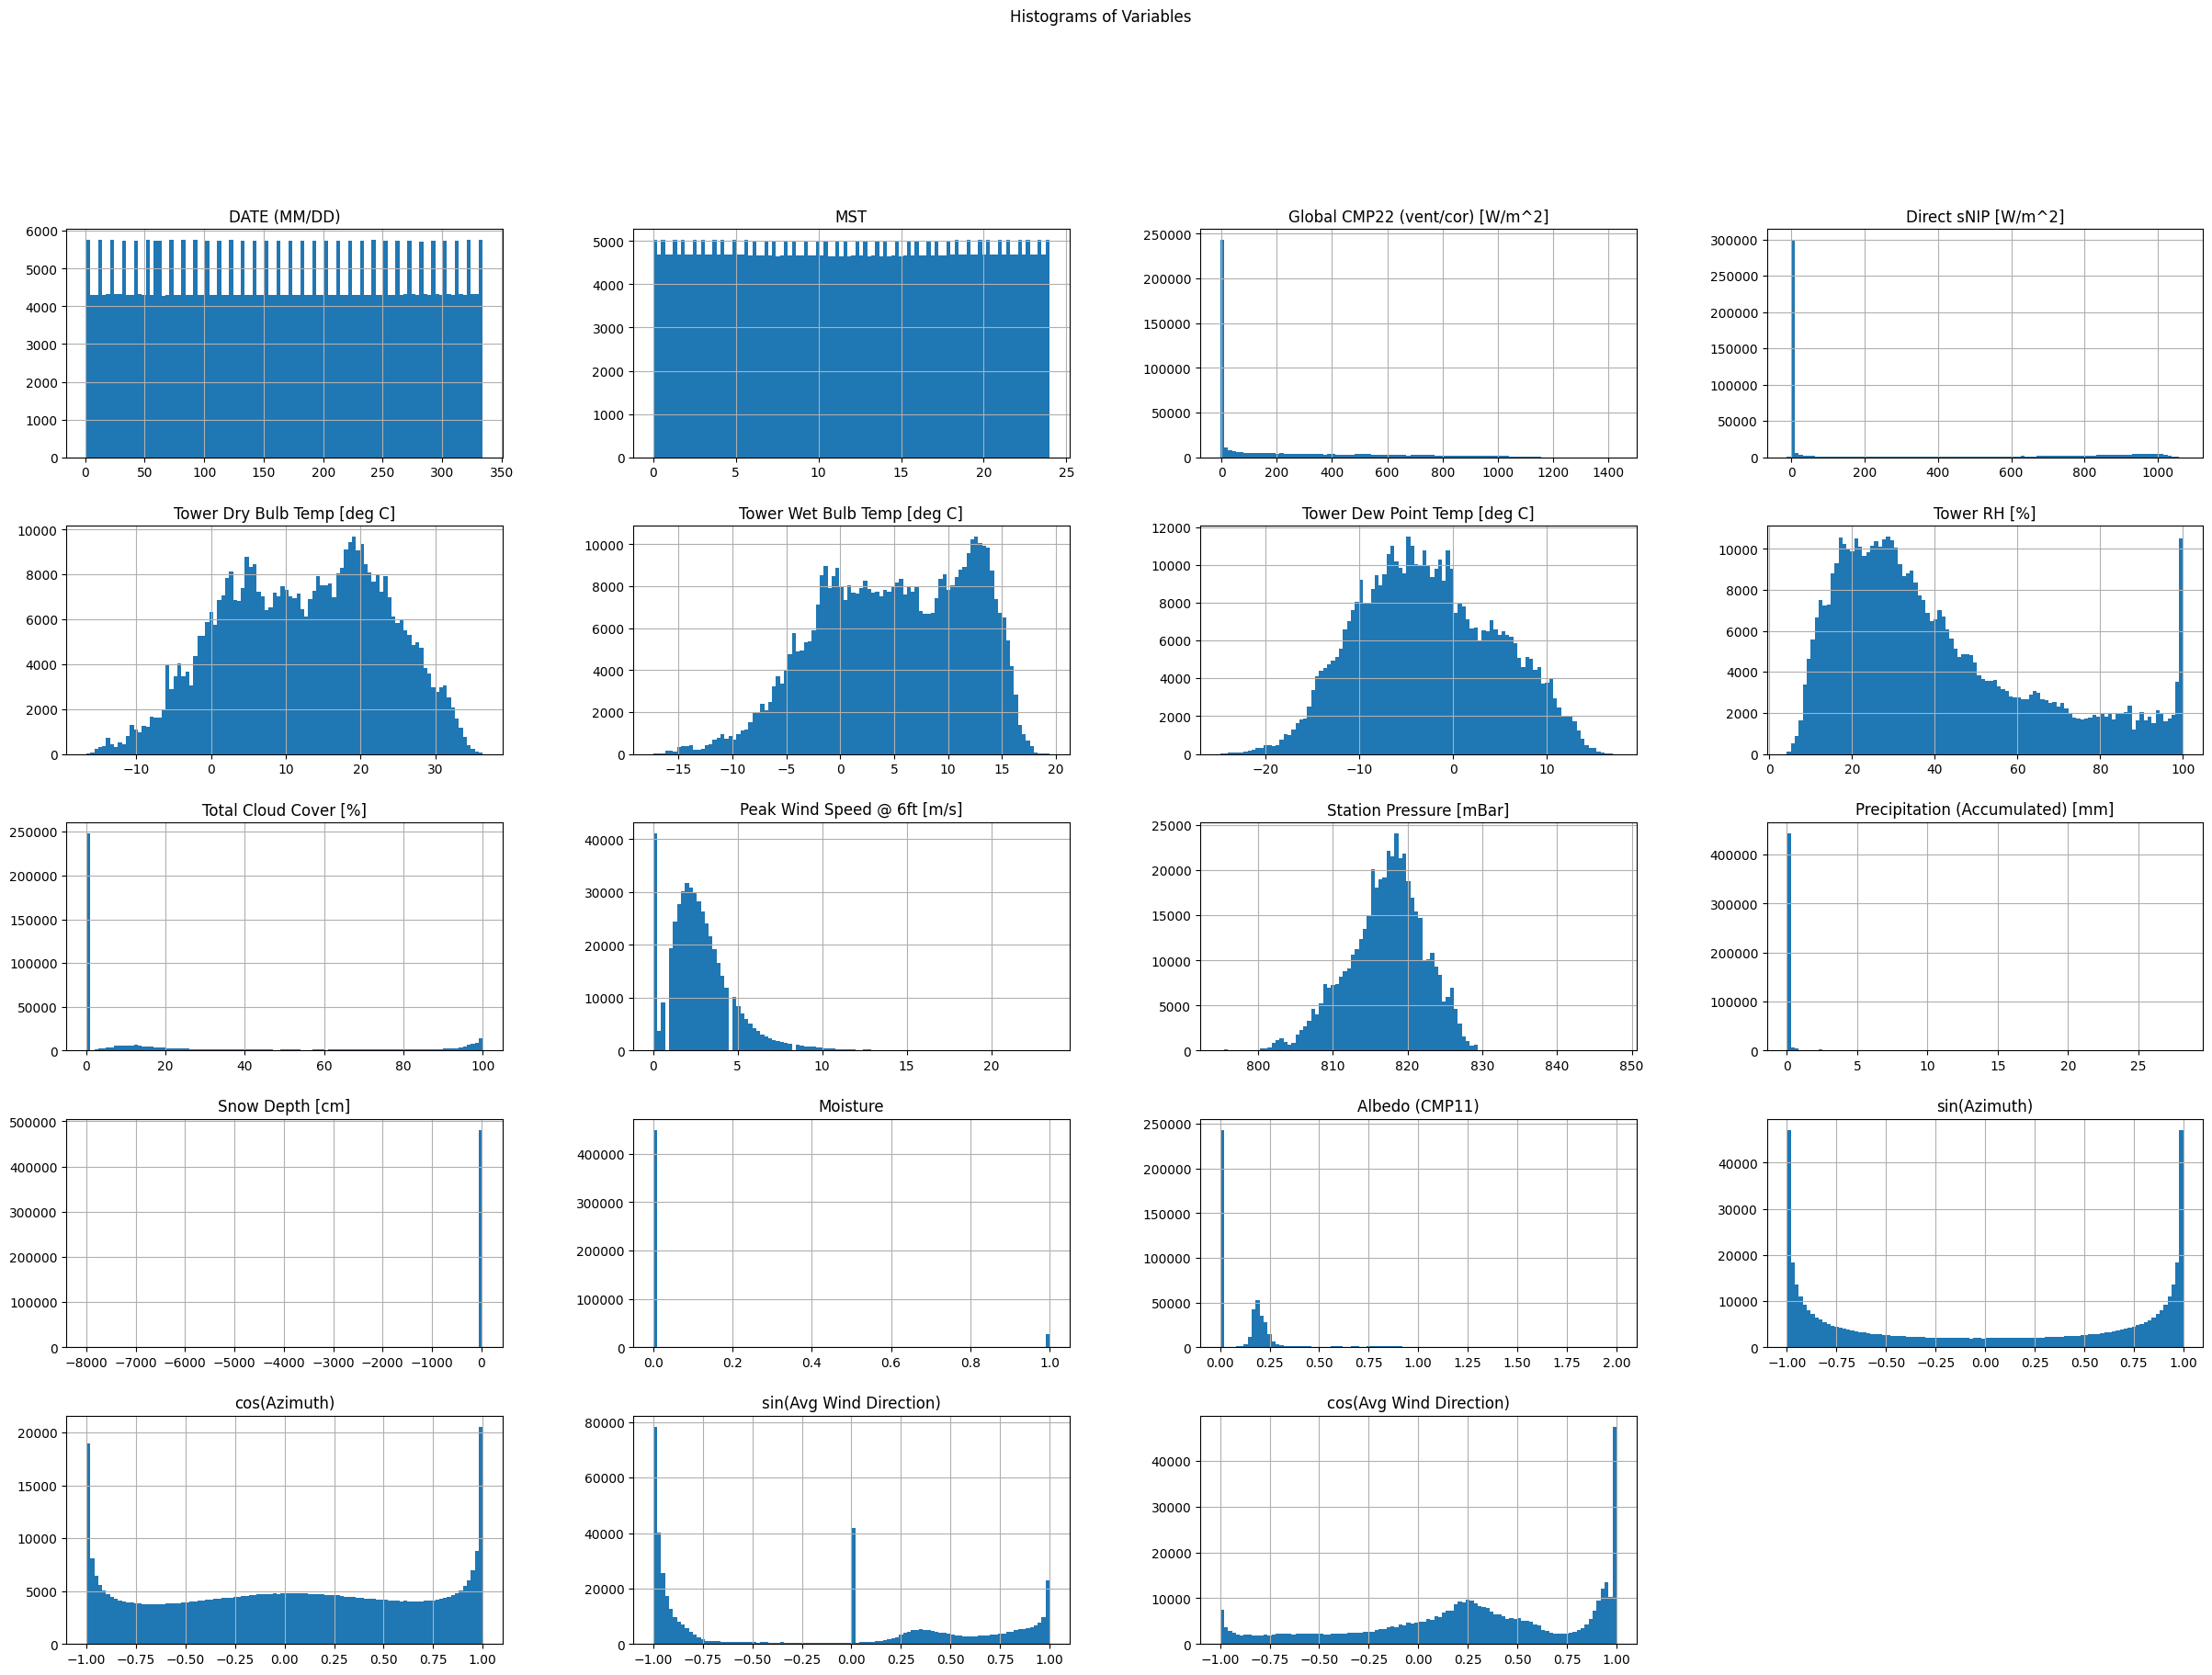

In [12]:
# plot histograms
df.hist(bins=100, figsize=(30, 20))
plt.suptitle('Histograms of Variables', y=1)
plt.show()

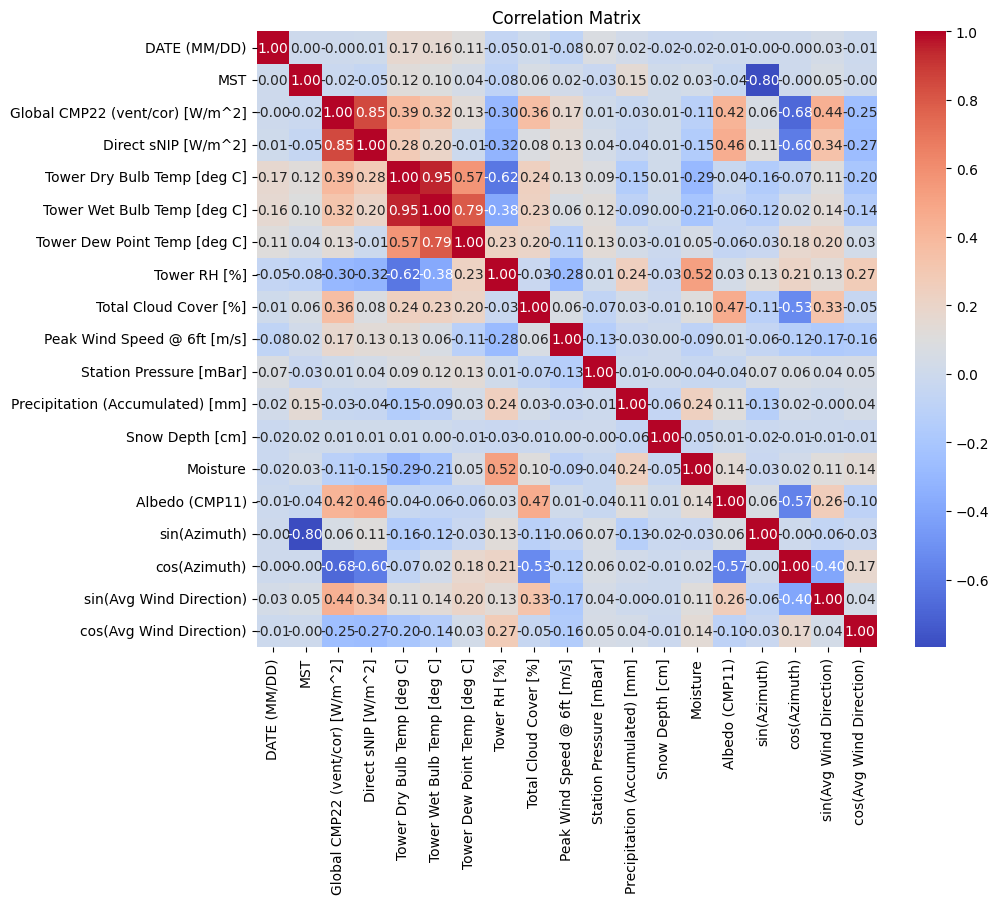

In [13]:
# plot the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# defining input and target features
X = df.drop(columns=['Total Cloud Cover [%]'])
y = df['Total Cloud Cover [%]']

In [15]:
# converting dataframe into numpy tensors
X = X.to_numpy()

# reshape y to (num_samples, 1)
y = y.to_numpy().reshape(-1, 1)

# visualize the tensor sizes
print(X.shape)
print(y.shape)

(480931, 18)
(480931, 1)


In [16]:
# function to create sequences for lstm
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

In [17]:
# window sizes & indices for 15, 25, 30 minutes predictions
sequence_length = 5
y_index = [15, 25, 30]  

# create sequences for lstm
X_seq, y_seq = create_sequences(X, y, sequence_length)

# train-test split (90-5-5 split for train, validation, and test sets)
train_size = int(0.9 * len(X))
val_size = test_size = (len(X) - train_size) // 2

X_train, y_train = X_seq[:train_size], y_seq[:train_size]
X_val, y_val = X_seq[train_size:train_size + val_size], y_seq[train_size:train_size + val_size]
X_test, y_test = X_seq[train_size + val_size:], y_seq[train_size + val_size:]

# visualize shapes
print(X_train.shape, X_val.shape, X_test.shape)

(432837, 5, 18) (24047, 5, 18) (24042, 5, 18)


In [18]:
def reshape_y_for_multiple_predictions(y, indices):
    reshaped_y = []
    for idx in indices:
        reshaped_y.append(y[:, 0].reshape(-1, 1))
    return np.concatenate(reshaped_y, axis=1)

# Reshape y_train, y_val, y_test for 15, 25, 30 minutes predictions
y_train = reshape_y_for_multiple_predictions(y_train, y_index)
y_val = reshape_y_for_multiple_predictions(y_val, y_index)
y_test = reshape_y_for_multiple_predictions(y_test, y_index)

# visualize shapes
print(y_train.shape, y_val.shape, y_test.shape)

(432837, 3) (24047, 3) (24042, 3)


---

## Model

---

In [19]:
# model imports
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2024-06-22 11:18:20.801283: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 11:18:20.801379: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 11:18:20.912309: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
# input shape i.e. (seq_length, num_features)
input_shape = (X_train.shape[1], X_train.shape[2])  

# lstm model architecture
inputs = Input(shape=input_shape)
lstm1 = LSTM(64, return_sequences=True)(inputs)
lstm2 = LSTM(32)(lstm1)

# output shape is (None, 3) for 15, 25, 30 minutes predictions
output = Dense(len(y_index))(lstm2)  

# model define
model = Model(inputs=inputs, outputs=output)

# model compile
optimizer = Adam(learning_rate=2e-5)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 5, 18)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 5, 64)          │        21,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,763 (131.89 KB)

 Trainable params: 33,763 (131.89 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# early stopping to prevent overfit
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [22]:
# train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100, batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/100
6764/6764 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - loss: 1752.5830 - mae: 24.4212 - val_loss: 658.4779 - val_mae: 10.7906
Epoch 2/100
6764/6764 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 1474.5208 - mae: 21.2540 - val_loss: 579.0964 - val_mae: 9.2718
Epoch 3/100
6764/6764 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 1308.3806 - mae: 19.7313 - val_loss: 515.5768 - val_mae: 8.7933
Epoch 4/100
6764/6764 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 1158.1462 - mae: 18.5095 - val_loss: 459.7249 - val_mae: 8.3735
Epoch 5/100
6764/6764 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 1026.0908 - mae: 17.3753 - val_loss: 404.7940 - val_mae: 7.6407
Epoch 6/100
6764/6764 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 895.4889 - mae: 16.1576 - val_loss: 358.8521 - val_mae: 7.2000
Epoch 7/100
6764/6764 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 786.0178 - mae: 15.2018 - val_loss: 318.4819 - val_mae: 6.8155
Epoch 8/100
6764/6764 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 685.2916 - mae: 14.2688 - val_loss: 281.9

In [23]:
# model save imports
import os
from tensorflow.keras.models import save_model

# specifying model dir
model_dir = '/kaggle/working/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# saving the model
save_model(model, os.path.join(model_dir, 'lstm_model.h5'))

---

## Model Evaluation

---

In [24]:
# model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mae_15 = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
    mae_25 = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
    mae_30 = mean_absolute_error(y_test[:, 2], y_pred[:, 2])

    r2_15 = r2_score(y_test[:, 0], y_pred[:, 0])
    r2_25 = r2_score(y_test[:, 1], y_pred[:, 1])
    r2_30 = r2_score(y_test[:, 2], y_pred[:, 2])

    # custom weighted average
    weighted_average_mae = (0.5 * mae_15) + (0.35 * mae_25) + (0.15 * mae_30)
    weighted_average_r2 = (0.5 * r2_15) + (0.35 * r2_25) + (0.15 * r2_30)

    print(f"MAE (15 minutes): {mae_15:.4f}")
    print(f"MAE (25 minutes): {mae_25:.4f}")
    print(f"MAE (30 minutes): {mae_30:.4f}")
    print(f"Weighted Average MAE: {weighted_average_mae:.4f}")
    print(f"R2 Score (15 minutes): {r2_15:.4f}")
    print(f"R2 Score (25 minutes): {r2_25:.4f}")
    print(f"R2 Score (30 minutes): {r2_30:.4f}")
    print(f"Weighted Average R2: {weighted_average_r2:.4f}")
    

    return mae_15, mae_25, mae_30, weighted_average_mae, r2_15, r2_25, r2_30, weighted_average_r2

In [25]:
# predictions
y_pred = model.predict(X_test)
results = evaluate_model(model, X_test, y_test)

752/752 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
752/752 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE (15 minutes): 2.4382
MAE (25 minutes): 2.4428
MAE (30 minutes): 2.4602
Weighted Average MAE: 2.4431
R2 Score (15 minutes): 0.9209
R2 Score (25 minutes): 0.9207
R2 Score (30 minutes): 0.9203
Weighted Average R2: 0.9207


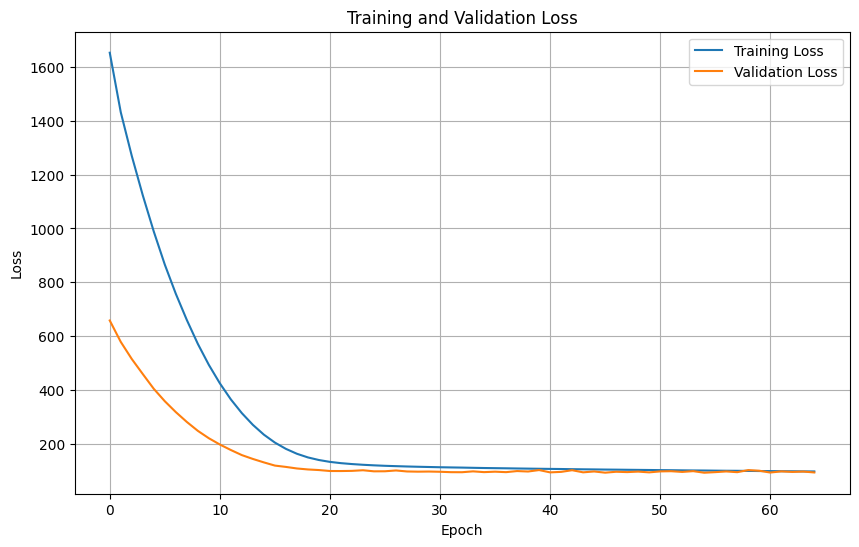

In [26]:
# plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

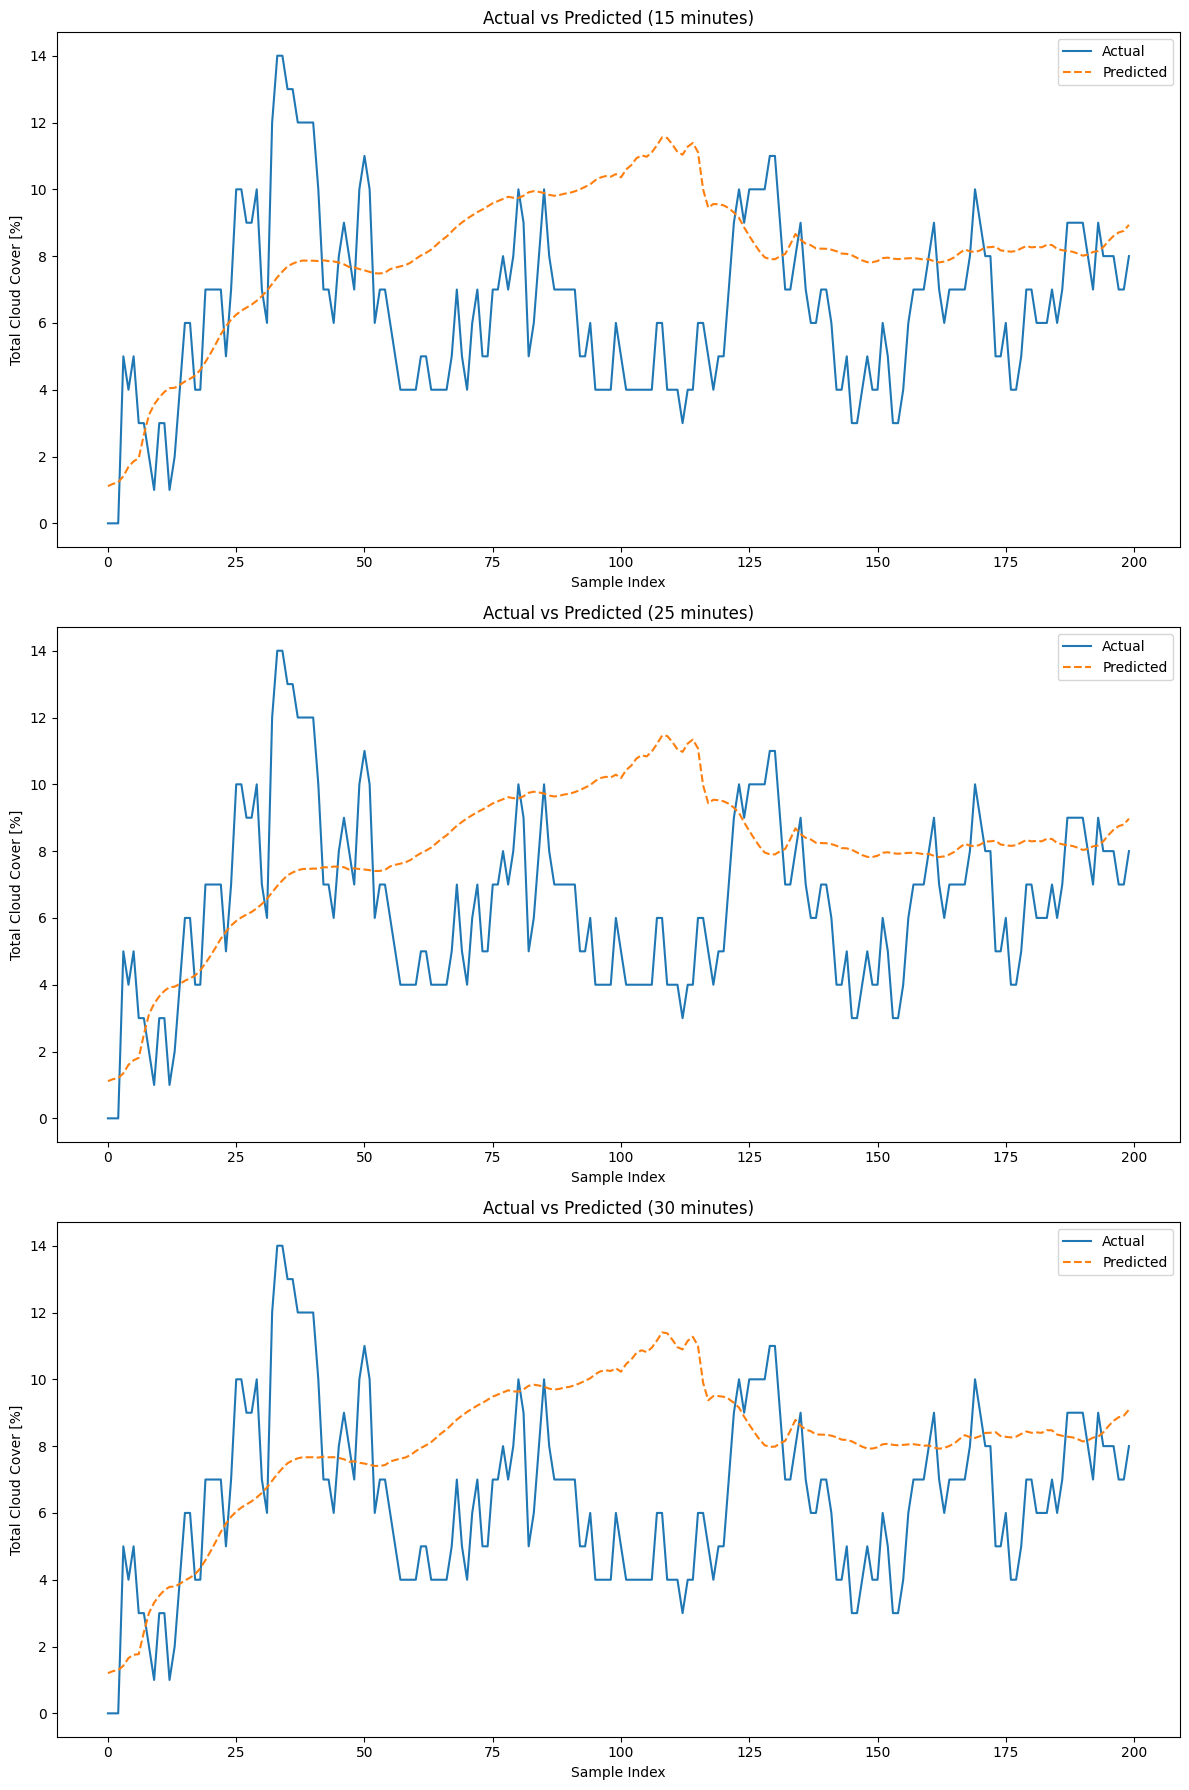

In [27]:
y_test = pd.DataFrame(y_test, columns=['15 minutes', '25 minutes', '30 minutes'])

time_horizons = ['15 minutes', '25 minutes', '30 minutes']
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
sample_size = 200
for i, ax in enumerate(axes):
    ax.plot(y_test.iloc[:sample_size, i].values, label='Actual', linestyle='-')
    ax.plot(y_pred[:sample_size, i], label='Predicted', linestyle='--')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Total Cloud Cover [%]')
    ax.set_title(f'Actual vs Predicted ({time_horizons[i]})')
    ax.legend()

plt.tight_layout()
plt.show()